In [5]:
# 데이터셋 준비하기

from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)


In [8]:

# 모델 구성하기 - Conv1D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))

model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))

model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# 모델 학습시키기
history = model.fit(pad_X_train, y_train,
                    batch_size = 32, epochs = 30,
                    validation_split = 0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.6162 - loss: 0.5946 - val_acc: 0.8602 - val_loss: 0.3286
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9092 - loss: 0.2369 - val_acc: 0.8756 - val_loss: 0.3082
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9551 - loss: 0.1301 - val_acc: 0.8680 - val_loss: 0.3575
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9807 - loss: 0.0652 - val_acc: 0.8682 - val_loss: 0.4500
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9946 - loss: 0.0252 - val_acc: 0.8622 - val_loss: 0.6008
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9988 - loss: 0.0090 - val_acc: 0.8584 - val_loss: 0.7116
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9998 - loss: 0.0025 - val_acc: 0.8630 - val_loss: 0.7699
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9999 - loss: 0.0014 - val_acc: 0.8620 - val_loss: 0.8340
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/

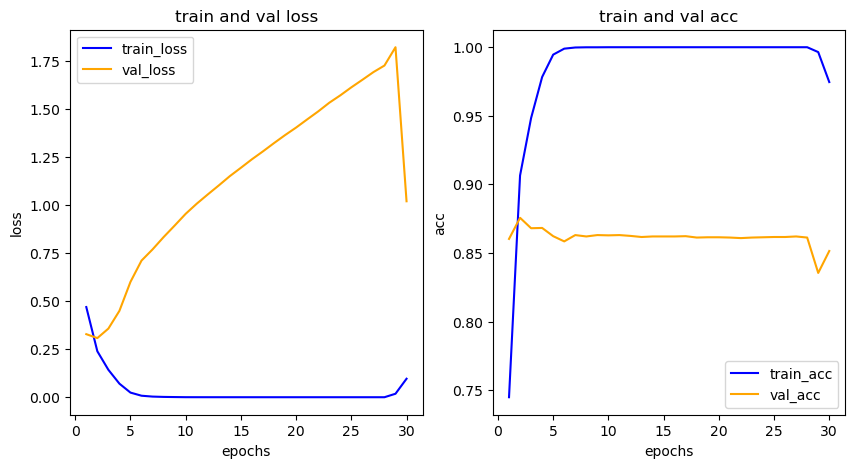

In [13]:
# 결과 그리기

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


In [15]:
# Conv1D층과 LSTM층 혼합하여 사용하기
# 모델 구성하기 - Conv1D + LSTM

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time <0.5,
                            np.cos(2*- np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

def make_sequence(time_series, n):
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [16]:
# 모델 구성 및 결과 확인하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))


# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss = 'mse',
              metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 200, batch_size = 32)

pred = model.predict(x_test)



Epoch 1/200


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 281.0695 - mse: 281.0695
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241.6102 - mse: 241.6102 
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.5755 - mse: 215.5755
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 214.3160 - mse: 214.3160
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187.0374 - mse: 187.0374
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.8357 - mse: 173.8357
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162.4333 - mse: 162.4333
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.9658 - mse: 154.9658
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.5434 - mse: 136.5434
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138.2440 - mse: 138.2440
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127.2835 - mse: 127.2835 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.5279 - mse: 105.5279

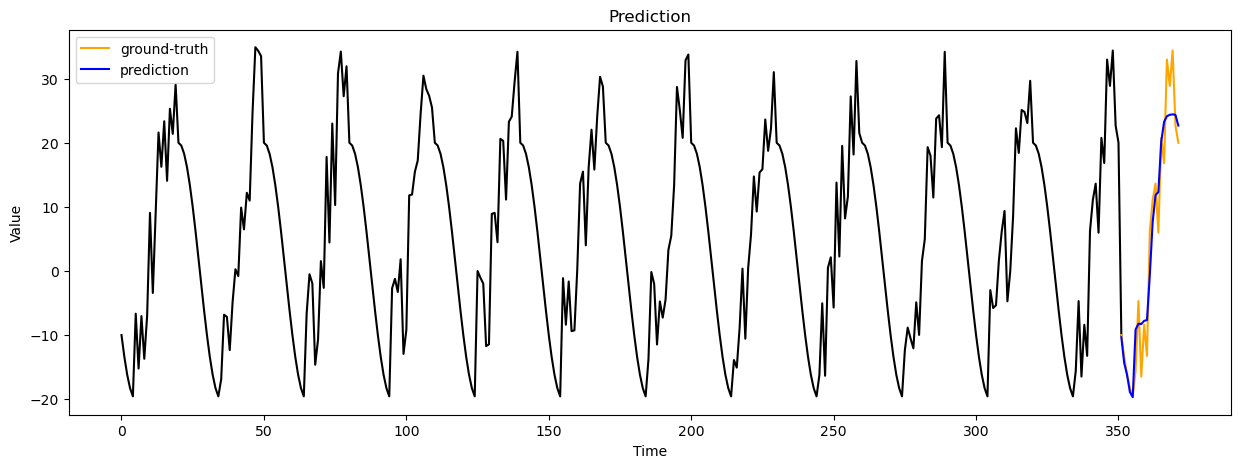

In [19]:
# 결괏값을 그립니다.

train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15, 5))
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color = 'orange', label = 'ground-truth')
plt.plot(pred_range, pred, color = 'blue', label = 'prediction')
plt.legend()
plt.show()